     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


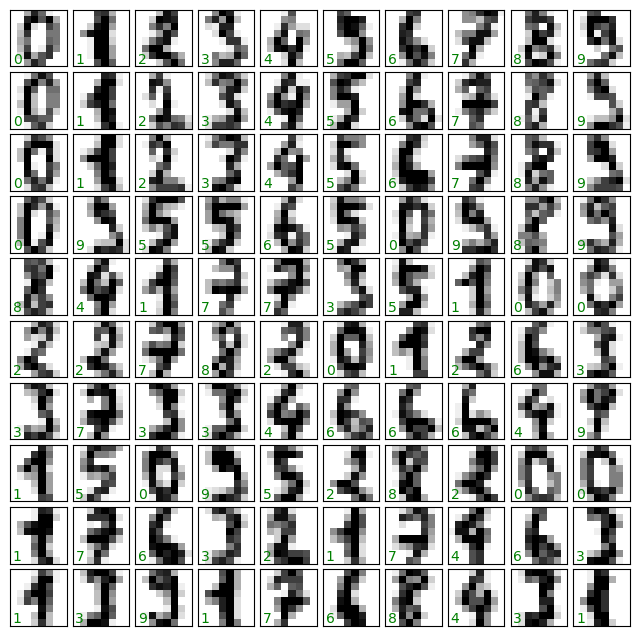

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      0.97      0.98        33
           3       1.00      0.94      0.97        34
           4       1.00      0.96      0.98        46
           5       0.98      0.98      0.98        47
           6       0.97      0.94      0.96        35
           7       0.92      0.97      0.94        34
           8       0.91      1.00      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



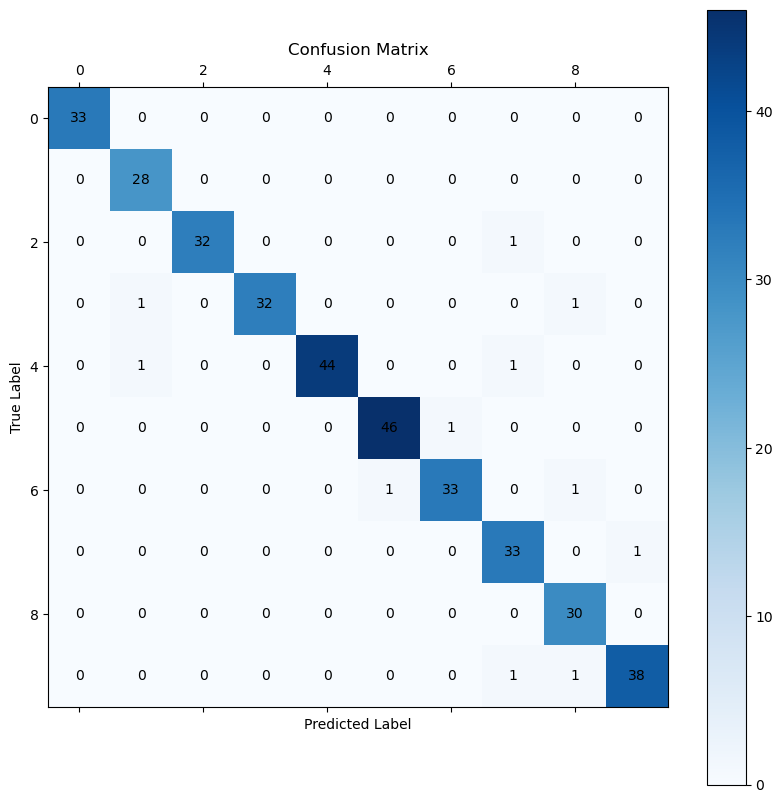

In [1]:
import pandas as pd  # Importing pandas for data manipulation.
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization.
from sklearn import datasets  # Importing sklearn's built-in datasets.
from sklearn.ensemble import GradientBoostingClassifier  # Importing Gradient Boosting classifier.
from sklearn.model_selection import train_test_split  # Importing function to split our data into training and testing sets.
from sklearn.metrics import classification_report, confusion_matrix  # Importing performance metrics.
import numpy as np  # Importing numpy for efficient numerical operations.

# Loading the built-in digits dataset.
digits = datasets.load_digits()

# Converting the data to a pandas DataFrame for easier manipulation and analysis.
df = pd.DataFrame(data=digits.data)
df['target'] = digits.target

# Displaying the first 5 rows of the DataFrame to see what our data looks like.
print(df.head())

# Creating a figure with multiple subplots to visualize some of the digits.
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Looping over each subplot to display an image of a digit and the corresponding label.
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

# Displaying the figure.
plt.show()

# Setting up our features (X) and target variable (y).
X = digits.data
y = digits.target

# Splitting our data into training and testing sets. The test size of 0.2 means 20% of the data will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gradient Boosting classifier model. This model works by combining several weak learning models to create a strong predictive model.
clf = GradientBoostingClassifier(random_state=42)

# Training the model on our training data.
clf.fit(X_train, y_train)

# Making predictions on our testing data.
y_pred = clf.predict(X_test)

# Printing a classification report, which includes several performance metrics.
print(classification_report(y_test, y_pred))

# Creating a confusion matrix, which shows the correct and incorrect predictions for each class.
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix.
plt.figure(figsize=(10, 10))
plt.matshow(cm, cmap=plt.cm.Blues, fignum=1)
plt.colorbar()

# Annotating our confusion matrix with their respective counts.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

# Adding labels and title to our confusion matrix plot.
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Displaying the plot.
plt.show()
